In [3]:
pip install citipy

     |████████████████████████████████| 557 kB 340 kB/s eta 0:00:01
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559701 sha256=92c4d70e4a2e27cf0265d57d86d247c9b47870f404475f822eb720a8190589e2
  Stored in directory: /Users/micahsmith817/Library/Caches/pip/wheels/6d/df/5e/ad8eb9cc5ee7f4ba76865167c09f9a7edff405c669111d8353
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


City Latitude vs. Max Temperature graph, as the latitude gets closer to 0 (equator) the max temperature increases. As the latitude gets farther from 0 (equator) the max temperature decreases. 
Max Temp vs. Latitude Linear Regression (Northern Hemisphere), this graph seems to have a negative coorelation. 
Max Temp vs. Latitude Linear Regression (Southern Hemisphere), this graph has a positive correlation. 

In [17]:
# Dependencies 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import requests 
import time 
import scipy.stats as st
from scipy.stats import linregress
import json 

# API Key 
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitde and longitude
from citipy import citipy 

# Output File (CSV)
output_data = "../Output_Data/cities_copy.csv"

# Range of Latitudes and Longitudes 
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [18]:
lat_lngs = []
cities = [] 

# Random Latitude and Longitude combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size = 1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size = 1500)
lat_lngs = zip(lats, lngs)

# Identify for each city latitude and longitude 
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities: 
        cities.append(city)
        
len(cities)

619

# Perform API Calls 

In [19]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build Query URL 
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# List of city data 
city_list = []
cloudiness_list = [] 
country_list = [] 
date_list = [] 
humidity_list = [] 
lat_list = [] 
lng_list = [] 
maxtemp_list = [] 
windspeed_list = []


# Print to logger 
print(f'Beginning Data Retrieval')
print(f'-----------------------------')

# Create counters 
set_counter = 1
index_counter = 0  

# Loop through all th citie in our list 
for city in cities:
    try: 
        # Group cities in sets of 50 for logging purposes 
        if (index_counter > 49):
            index_counter = 0 
            set_counter = set_counter + 1 
        else: 
            index_counter = index_counter + 1
            print(f"Processing Record {index_counter} of Set {set_counter} | {city}")
        # Run API request for each of the cities 
        data = requests.get(query_url + city).json()
        city_list.append(data["name"])
        lat_list.append(data["coord"]["lat"])
        lng_list.append(data["coord"]["lon"])
        maxtemp_list.append(data["main"]["temp_max"])
        humidity_list.append(data["main"]["humidity"])
        cloudiness_list.append(data["clouds"]["all"])
        windspeed_list.append(data["wind"]["speed"])
        country_list.append(data["sys"]["country"])
        date_list.append(data["dt"])
    except:
        print("City not found. Skipping...")
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------") 

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | acapulco
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | alofi
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | ponta do sol
Processing Record 8 of Set 1 | hunza
City not found. Skipping...
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | lata
Processing Record 14 of Set 1 | nouadhibou
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | tabas
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | kulhudhuffushi
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | talcahuano
Processing Record 21 of Set 1

Processing Record 36 of Set 4 | barentu
Processing Record 37 of Set 4 | port elizabeth
Processing Record 38 of Set 4 | barmer
Processing Record 39 of Set 4 | isangel
Processing Record 40 of Set 4 | saint george
Processing Record 41 of Set 4 | oktyabrskoye
Processing Record 42 of Set 4 | muros
Processing Record 43 of Set 4 | hasaki
Processing Record 44 of Set 4 | merauke
Processing Record 45 of Set 4 | pangody
Processing Record 46 of Set 4 | esperance
Processing Record 47 of Set 4 | lompoc
Processing Record 48 of Set 4 | sierra vista
Processing Record 49 of Set 4 | deniliquin
Processing Record 50 of Set 4 | michigan city
City not found. Skipping...
Processing Record 1 of Set 5 | garowe
Processing Record 2 of Set 5 | saint-augustin
Processing Record 3 of Set 5 | olinda
Processing Record 4 of Set 5 | tuktoyaktuk
Processing Record 5 of Set 5 | mitsamiouli
Processing Record 6 of Set 5 | cahors
Processing Record 7 of Set 5 | sieradz
Processing Record 8 of Set 5 | karratha
Processing Record 9

Processing Record 30 of Set 8 | canico
Processing Record 31 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 32 of Set 8 | lorengau
Processing Record 33 of Set 8 | skibbereen
Processing Record 34 of Set 8 | fortuna
Processing Record 35 of Set 8 | faanui
Processing Record 36 of Set 8 | omsukchan
Processing Record 37 of Set 8 | kharan
Processing Record 38 of Set 8 | cedar city
Processing Record 39 of Set 8 | jawhar
Processing Record 40 of Set 8 | boende
Processing Record 41 of Set 8 | panama city
Processing Record 42 of Set 8 | alihe
Processing Record 43 of Set 8 | kaeo
Processing Record 44 of Set 8 | sisimiut
Processing Record 45 of Set 8 | sompeta
Processing Record 46 of Set 8 | harper
Processing Record 47 of Set 8 | hyderabad
Processing Record 48 of Set 8 | sault sainte marie
Processing Record 49 of Set 8 | talnakh
Processing Record 50 of Set 8 | narsaq
Processing Record 1 of Set 9 | banjar
Processing Record 2 of Set 9 | north branch
Processing Record 3 of Set 9 | afl

Processing Record 16 of Set 12 | dikson
Processing Record 17 of Set 12 | hudiksvall
Processing Record 18 of Set 12 | uglovskoye
Processing Record 19 of Set 12 | dandong
Processing Record 20 of Set 12 | loum
Processing Record 21 of Set 12 | belluno
Processing Record 22 of Set 12 | ndele
Processing Record 23 of Set 12 | leshukonskoye
Processing Record 24 of Set 12 | ita
Processing Record 25 of Set 12 | bambous virieux
Processing Record 26 of Set 12 | bemidji
Processing Record 27 of Set 12 | felanitx
Processing Record 28 of Set 12 | parrita
Processing Record 29 of Set 12 | puerto escondido
Processing Record 30 of Set 12 | vostok
Processing Record 31 of Set 12 | sibu
Processing Record 32 of Set 12 | yarada
Processing Record 33 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 34 of Set 12 | haibowan
City not found. Skipping...
Processing Record 35 of Set 12 | benguela
Processing Record 36 of Set 12 | sobolevo
Processing Record 37 of Set 12 | ivanovskoye
Processing Record 3

# Convert Raw Data to DataFrame 

In [20]:
# Convert array of JSONs into Panadas DataFrame 
weather_data = pd.DataFrame({
    "City" : city_list,
    "Lat" : lat_list, 
    "Lng" : lng_list, 
    "Max Temp" : maxtemp_list, 
    "Humidity" : humidity_list, 
    "Cloudiness" : cloudiness_list, 
    "Wind Speed" : windspeed_list, 
    "Country" : country_list, 
    "Date" : date_list
})

weather_data.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [21]:
# Display the City Data Frame 
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Acapulco de Juárez,16.86,-99.89,84.20,74,75,2.24,MX,1602865454
1,Thompson,55.74,-97.86,28.40,86,90,13.87,CA,1602865528
2,Saint Paul Harbor,57.79,-152.41,30.20,80,1,5.82,US,1602865650
3,Alofi,-19.06,-169.92,73.40,94,85,4.70,NU,1602865650
4,Mataura,-46.19,168.86,33.39,94,33,1.95,NZ,1602865650
...,...,...,...,...,...,...,...,...,...
561,Joplin,37.08,-94.51,61.00,28,1,9.17,US,1602865718
562,Kattivākkam,13.22,80.32,86.00,79,40,5.82,IN,1602865719
563,Nome,64.50,-165.41,37.40,86,90,28.86,US,1602865719
564,Mayskiy,47.69,40.10,64.40,59,90,4.79,RU,1602865719


In [22]:
# Export city data into a .csv 
weather_data.to_csv(output_data, index=False, header=True)

# Inspect the data and remove the cities where the humidity > 100%
Skip this step if there are no cities that have humidity > 100%

In [23]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,19.952350,18.390336,62.715883,68.899293,49.549470,8.087527,1.602866e+09
std,32.865932,92.604307,20.675367,22.457246,38.597586,5.409462,6.563814e+01
min,-54.800000,-179.170000,-3.570000,8.000000,0.000000,0.560000,1.602865e+09
25%,-8.477500,-63.045000,46.400000,55.000000,4.000000,3.980000,1.602866e+09
50%,24.370000,23.230000,66.210000,75.000000,50.000000,6.930000,1.602866e+09
75%,46.690000,103.205000,78.800000,86.000000,90.000000,11.270000,1.602866e+09
max,78.220000,179.320000,103.460000,100.000000,100.000000,33.400000,1.602866e+09


# Latitude vs. Temperature Plot 

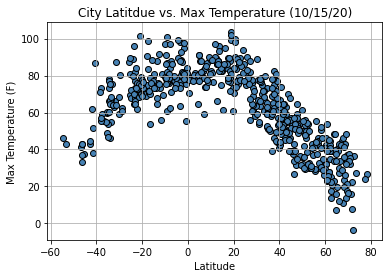

<Figure size 432x288 with 0 Axes>

In [24]:
# Build scatter plot for latitude vs. temperature 
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], facecolor = "steelblue", edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitdue vs. Max Temperature (10/15/20)")
plt.show()

# Save figure 
plt.savefig("../Output_Data/Latitude_vs_MaxTemperature.png")

# Latitude vs. Humidity Plot 

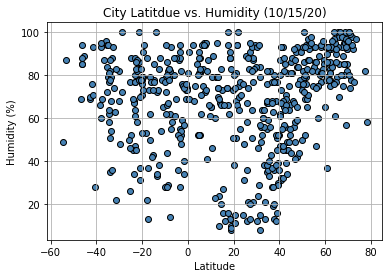

<Figure size 432x288 with 0 Axes>

In [25]:
# Build the scatter plot for latitude vs. humidity 

plt.scatter(weather_data["Lat"], weather_data["Humidity"], facecolor = "steelblue", edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitdue vs. Humidity (10/15/20)")
plt.show()

# Save figure 
plt.savefig("../Output_Data/Latitude_vs_Humidity.png")

# Latitude vs. Cloudiness Plot 

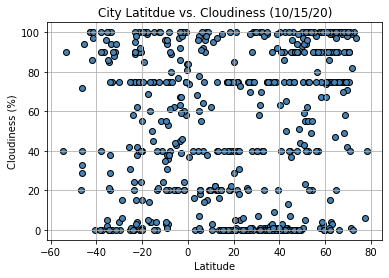

<Figure size 432x288 with 0 Axes>

In [26]:
# Build the scatter plots for latitude vs. cloudiness 

plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], facecolor = "steelblue", edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitdue vs. Cloudiness (10/15/20)")
plt.show()

# Save figure 
plt.savefig("../Output_Data/Latitude_vs_Cloudiness.png")

# Latitude vs. Wind Speed Plot 

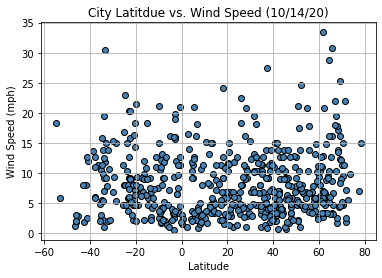

<Figure size 432x288 with 0 Axes>

In [27]:
# Build the scatter plots for latitude vs. wind speed 

plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitdue vs. Wind Speed (10/14/20)")
plt.show()

# Save figure 
plt.savefig("../Output_Data/Latitude_vs_WindSpeed.png")

# Linear Regression 

In [28]:
# Create a function to create Linear Regression plots
def linearregress(x,y):
    print(f"The r-squared is : {st.pearsonr(x, y)[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Create a function for annotating 
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

In [29]:
# Create Northern and Southern Hemisphere DataFrames 
northern_hemi = weather_data.loc[weather_data["Lat"] >= 0]
southern_hemi = weather_data.loc[weather_data["Lat"] < 0]

# Max Temp vs. Latitude Linear Regression

The r-squared is : -0.8757875949039738


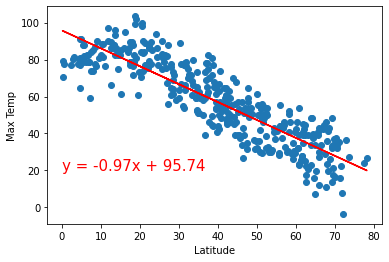

<Figure size 432x288 with 0 Axes>

In [30]:
# Linear Regression on Northern Hemisphere 
eq = linearregress(northern_hemi["Lat"], northern_hemi["Max Temp"])
lnr_eq = annotate(eq, 0, 20)

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

# Save figure 
plt.savefig("../Output_Data/Northern_Latitude_vs_MaxTemperature.png")

The r-squared is : 0.6706180025612578


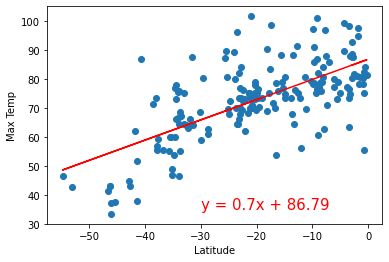

<Figure size 432x288 with 0 Axes>

In [31]:
# Linear Regression on Southern Hemisphere 
eq = linearregress(southern_hemi["Lat"], southern_hemi["Max Temp"])
lnr_eq = annotate(eq, -30, 35)

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

# Save figure 
plt.savefig("../Output_Data/Southern_Latitude_vs_MaxTemperature.png")

# Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.30234820209801566


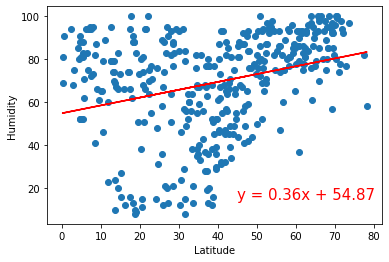

<Figure size 432x288 with 0 Axes>

In [32]:
# Northern Hemisphere 
eq = linearregress(northern_hemi["Lat"], northern_hemi["Humidity"])
lnr_eq = annotate(eq, 45, 15)

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

# Save figure 
plt.savefig("../Output_Data/Northern_Latitude_vs_Humidity.png")

The r-squared is : -0.1569401450538245


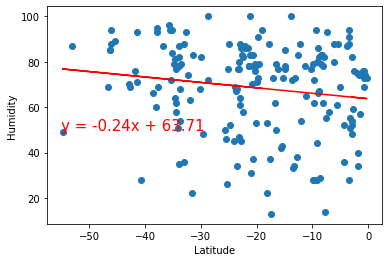

<Figure size 432x288 with 0 Axes>

In [33]:
# Southern Hemisphere 
eq = linearregress(southern_hemi["Lat"], southern_hemi["Humidity"])
lnr_eq = annotate(eq, -55, 50)

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

# Save figure 
plt.savefig("../Output_Data/Southern_Latitude_vs_Humidity.png")

# Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.285978364361748


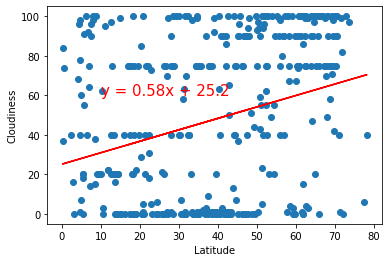

<Figure size 432x288 with 0 Axes>

In [34]:
# Northern Hemisphere 
eq = linearregress(northern_hemi["Lat"], northern_hemi["Cloudiness"])
lnr_eq = annotate(eq, 10, 60)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

# Save figure 
plt.savefig("../Output_Data/Southern_Latitude_vs_Cloudiness.png")

The r-squared is : 0.061105472637610986


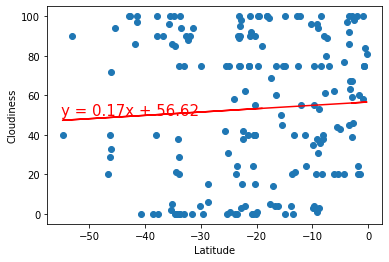

<Figure size 432x288 with 0 Axes>

In [35]:
#Southern Hemisphere
eq = linearregress(southern_hemi["Lat"], southern_hemi["Cloudiness"])
lnr_eq = annotate(eq, -55, 50)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

# Save figure 
plt.savefig("../Output_Data/Southern_Latitude_vs_Cloudiness.png")

# Wind Speed (mph) vs. Latitude Linear Regression 

The r-squared is : 0.16444475654839838


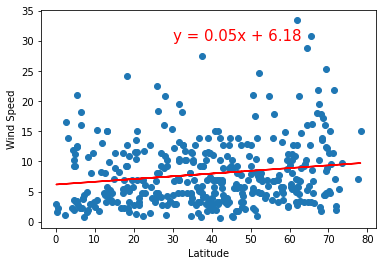

<Figure size 432x288 with 0 Axes>

In [36]:
# Northern Hemisphere 
eq = linearregress(northern_hemi["Lat"], northern_hemi["Wind Speed"])
lnr_eq = annotate(eq, 30, 30)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

# Save figure 
plt.savefig("../Output_Data/Northern_Latitude_vs_WindSpeed.png")

The r-squared is : -0.01610352877753992


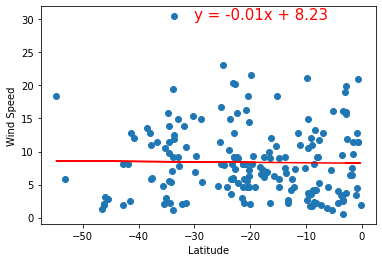

<Figure size 432x288 with 0 Axes>

In [37]:
# Southern Hemisphere
eq = linearregress(southern_hemi["Lat"], southern_hemi["Wind Speed"])
lnr_eq = annotate(eq, -30, 30)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

# Save figure 
plt.savefig("../Output_Data/Southern_Latitude_vs_WindSpeed.png")